In [13]:
from pprint import pprint

import colour
import numpy as np

In [2]:
wr = 0.3127
wg = 0.3290
wb = 1 - wr - wg

xr = 0.64
xg = 0.30
xb = 0.15

yr = 0.33
yg = 0.60
yb = 0.06

zr = 1 - xr - yr
zg = 1 - xg - yg
zb = 1 - xb - yb

print(xr, xg, xb)

0.64 0.3 0.15


In [3]:
k = 1.0 / wg
W = np.array([wr*k, 1.00, wb*k])
print(W)

[ 0.95045593  1.          1.08905775]


$$
\begin{bmatrix} 
Sr\\ 
Sg\\ 
Sb\\
\end{bmatrix}
=
\begin{bmatrix} 
xr & xg & xb \\ 
yr & yg & yb \\ 
zr & zg & zb \\
\end{bmatrix} ^ {-1}
\begin{bmatrix} 
Xw \\ 
Yw \\ 
Zw \\
\end{bmatrix}
$$

In [4]:
m = np.array([
    [xr, xg, xb],
    [yr, yg, yb],
    [zr, zg, zb]])
print(m)

[[ 0.64  0.3   0.15]
 [ 0.33  0.6   0.06]
 [ 0.03  0.1   0.79]]


$$
\begin{bmatrix} 
Sr\\ 
Sg\\ 
Sb\\
\end{bmatrix}
=
\begin{bmatrix} 
0.64 & 0.3 & 0.15 \\ 
0.33 & 0.6 & 0.06 \\ 
0.03 & 0.1 & 0.79 \\
\end{bmatrix} ^ {-1}
\begin{bmatrix} 
0.9506 \\ 
1.0000 \\ 
1.0891 \\
\end{bmatrix}
$$

In [5]:
im = np.linalg.inv(m)
print(im)

[[ 2.08835341 -0.99062918 -0.32128514]
 [-1.15528782  2.23605533  0.04953146]
 [ 0.0669344  -0.24542615  1.27175368]]


$$
\begin{bmatrix} 
Sr\\ 
Sg\\ 
Sb\\
\end{bmatrix}
=
\begin{bmatrix} 
2.088 & -0.991 & -0.321 \\ 
-1.155 & 2.236 & 0.050 \\ 
0.067 & 0.245 & 1.272 \\
\end{bmatrix}
\begin{bmatrix} 
0.9506 \\ 
1.0000 \\ 
1.0891 \\
\end{bmatrix}
$$

In [6]:
S = im@W
print(S)

[ 0.64436062  1.1919478   1.20320526]


$$
\begin{bmatrix} 
0.6443\\ 
1.1919\\ 
1.2032\\
\end{bmatrix}
$$

In [7]:
X = np.array([xr*S[0], xg*S[1], xb*S[2]])
Y = np.array([yr*S[0], yg*S[1], yb*S[2]])
Z = np.array([zr*S[0], zg*S[1], zb*S[2]])

$$
\begin{bmatrix} 
X\\ 
Y\\ 
Z\\
\end{bmatrix}
=
\begin{bmatrix} 
Xr & Xg & Xb \\ 
Yr & Yg & Yg \\ 
Zr & Zg & Zg \\
\end{bmatrix}
\begin{bmatrix} 
R \\ 
G \\ 
B \\
\end{bmatrix}
$$

In [8]:
RGB_to_XYZ = np.array([X, Y, Z])
RGB_to_XYZ

array([[ 0.4123908 ,  0.35758434,  0.18048079],
       [ 0.21263901,  0.71516868,  0.07219232],
       [ 0.01933082,  0.11919478,  0.95053215]])

$$
\begin{bmatrix} 
R\\ 
G\\ 
B\\
\end{bmatrix}
=
\begin{bmatrix} 
Xr & Xg & Xb \\ 
Yr & Yg & Yg \\ 
Zr & Zg & Zg \\
\end{bmatrix}^ {-1}
\begin{bmatrix} 
X \\ 
Y \\ 
Z \\
\end{bmatrix}
$$

In [9]:
XYZ_to_RGB = np.linalg.inv(RGB_to_XYZ)
XYZ_to_RGB

array([[ 3.24096994, -1.53738318, -0.49861076],
       [-0.96924364,  1.8759675 ,  0.04155506],
       [ 0.05563008, -0.20397696,  1.05697151]])

### COLOUR モジュールで計算する場合

In [10]:
import colour

In [14]:
p = [0.64, 0.33, 0.30, 0.60, 0.15, 0.06]
w = [0.3127, 0.3290]

colour.normalised_primary_matrix(p, w)

array([[ 0.4123908 ,  0.35758434,  0.18048079],
       [ 0.21263901,  0.71516868,  0.07219232],
       [ 0.01933082,  0.11919478,  0.95053215]])

#### RGB_COLOURSPACESファンクション

In [15]:
sorted(colour.RGB_COLOURSPACES)

['ACES2065-1',
 'ACEScc',
 'ACEScct',
 'ACEScg',
 'ACESproxy',
 'ALEXA Wide Gamut',
 'ARRI Wide Gamut 3',
 'ARRI Wide Gamut 4',
 'Adobe RGB (1998)',
 'Adobe Wide Gamut RGB',
 'Apple RGB',
 'Best RGB',
 'Beta RGB',
 'Blackmagic Wide Gamut',
 'CIE RGB',
 'Cinema Gamut',
 'ColorMatch RGB',
 'DCDM XYZ',
 'DCI-P3',
 'DCI-P3-P',
 'DJI D-Gamut',
 'DRAGONcolor',
 'DRAGONcolor2',
 'DaVinci Wide Gamut',
 'Display P3',
 'Don RGB 4',
 'EBU Tech. 3213-E',
 'ECI RGB v2',
 'ERIMM RGB',
 'Ekta Space PS 5',
 'F-Gamut',
 'FilmLight E-Gamut',
 'ITU-R BT.2020',
 'ITU-R BT.470 - 525',
 'ITU-R BT.470 - 625',
 'ITU-R BT.709',
 'ITU-T H.273 - 22 Unspecified',
 'ITU-T H.273 - Generic Film',
 'Max RGB',
 'N-Gamut',
 'NTSC (1953)',
 'NTSC (1987)',
 'P3-D65',
 'PLASA ANSI E1.54',
 'Pal/Secam',
 'ProPhoto RGB',
 'Protune Native',
 'REDWideGamutRGB',
 'REDcolor',
 'REDcolor2',
 'REDcolor3',
 'REDcolor4',
 'RIMM RGB',
 'ROMM RGB',
 'Russell RGB',
 'S-Gamut',
 'S-Gamut3',
 'S-Gamut3.Cine',
 'SMPTE 240M',
 'SMPTE C',


In [16]:
pprint(colour.RGB_COLOURSPACES)

LazyCanonicalMapping({'ACES2065-1': RGB_Colourspace('ACES2065-1',
                [[  7.34700000e-01,   2.65300000e-01],
                 [  0.00000000e+00,   1.00000000e+00],
                 [  1.00000000e-04,  -7.70000000e-02]],
                [ 0.32168,  0.33767],
                'ACES',
                [[  9.52552396e-01,   0.00000000e+00,   9.36786000e-05],
                 [  3.43966450e-01,   7.28166097e-01,  -7.21325464e-02],
                 [  0.00000000e+00,   0.00000000e+00,   1.00882518e+00]],
                [[  1.04981102e+00,   0.00000000e+00,  -9.74845000e-05],
                 [ -4.95903023e-01,   1.37331305e+00,   9.82400361e-02],
                 [  0.00000000e+00,   0.00000000e+00,   9.91252018e-01]],
                linear_function,
                linear_function,
                False,
                False), 'ACEScc': RGB_Colourspace('ACEScc',
                [[ 0.713,  0.293],
                 [ 0.165,  0.83 ],
                 [ 0.128,  0.044]],
           

f:\Users\yamagishi\Dropbox\develop\venv\colour-py311\Lib\site-packages\colour\utilities\verbose.py:265: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)  # noqa: B028


In [17]:
colorspace = colour.RGB_COLOURSPACES['sRGB']
colorspace

RGB_Colourspace('sRGB',
                [[ 0.64,  0.33],
                 [ 0.3 ,  0.6 ],
                 [ 0.15,  0.06]],
                [ 0.3127,  0.329 ],
                'D65',
                [[ 0.4124,  0.3576,  0.1805],
                 [ 0.2126,  0.7152,  0.0722],
                 [ 0.0193,  0.1192,  0.9505]],
                [[ 3.2406, -1.5372, -0.4986],
                 [-0.9689,  1.8758,  0.0415],
                 [ 0.0557, -0.204 ,  1.057 ]],
                eotf_inverse_sRGB,
                eotf_sRGB,
                False,
                False)

In [18]:
type(colorspace)

colour.models.rgb.rgb_colourspace.RGB_Colourspace

### colour.RGB_Colourspace
https://colour.readthedocs.io/en/latest/generated/colour.RGB_Colourspace.html?highlight=RGB_Colourspace

In [19]:
dir(colorspace)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cctf_decoding',
 '_cctf_encoding',
 '_derive_transformation_matrices',
 '_derived_matrix_RGB_to_XYZ',
 '_derived_matrix_XYZ_to_RGB',
 '_matrix_RGB_to_XYZ',
 '_matrix_XYZ_to_RGB',
 '_name',
 '_primaries',
 '_use_derived_matrix_RGB_to_XYZ',
 '_use_derived_matrix_XYZ_to_RGB',
 '_whitepoint',
 '_whitepoint_name',
 'cctf_decoding',
 'cctf_encoding',
 'chromatically_adapt',
 'copy',
 'matrix_RGB_to_XYZ',
 'matrix_XYZ_to_RGB',
 'name',
 'primaries',
 'use_derived_matrix_RGB_to_XYZ',
 'use_derived_matrix_XYZ_to_RGB',
 'use_derived_transformation_matrices',
 'whitepoint',
 'whitepoint_name']

In [20]:
colorspace.name

'sRGB'

In [21]:
colorspace.primaries

array([[ 0.64,  0.33],
       [ 0.3 ,  0.6 ],
       [ 0.15,  0.06]])

In [22]:
colorspace.whitepoint

array([ 0.3127,  0.329 ])

In [23]:
colorspace.whitepoint_name

'D65'

In [27]:
colorspace.matrix_RGB_to_XYZ

array([[ 0.4124,  0.3576,  0.1805],
       [ 0.2126,  0.7152,  0.0722],
       [ 0.0193,  0.1192,  0.9505]])

In [28]:
colorspace.matrix_XYZ_to_RGB

array([[ 3.2406, -1.5372, -0.4986],
       [-0.9689,  1.8758,  0.0415],
       [ 0.0557, -0.204 ,  1.057 ]])

In [29]:
colorspace.cctf_encoding 

<function colour.models.rgb.transfer_functions.srgb.eotf_inverse_sRGB(L: 'ArrayLike') -> 'NDArrayFloat'>

In [74]:
colorspace.cctf_decoding

<function colour.models.rgb.transfer_functions.srgb.eotf_sRGB(V)>

### RGB_Colourspace Class
ACES Colorspace

In [65]:
p = [0.73470, 0.26530, 0.00000, 1.00000, 0.00010, -0.07700]
w = [0.32168, 0.33767]

RGB_to_XYZ_matrix = np.identity(3)
XYZ_to_RGB_matrix = np.identity(3)

colourspace = colour.RGB_Colourspace(
    'RGB Colourspace', p, w, 'ACES',
    RGB_to_XYZ_matrix,
    XYZ_to_RGB_matrix)

In [66]:
colourspace.RGB_to_XYZ_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [67]:
colourspace.XYZ_to_RGB_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [68]:
colourspace.use_derived_transformation_matrices(True)

True

In [69]:
colourspace.RGB_to_XYZ_matrix

array([[  9.52552396e-01,   0.00000000e+00,   9.36786317e-05],
       [  3.43966450e-01,   7.28166097e-01,  -7.21325464e-02],
       [  0.00000000e+00,   0.00000000e+00,   1.00882518e+00]])

In [70]:
colourspace.XYZ_to_RGB_matrix

array([[  1.04981102e+00,   0.00000000e+00,  -9.74845406e-05],
       [ -4.95903023e-01,   1.37331305e+00,   9.82400361e-02],
       [  0.00000000e+00,   0.00000000e+00,   9.91252018e-01]])

In [71]:
colourspace.use_derived_RGB_to_XYZ_matrix = False

In [72]:
colourspace.RGB_to_XYZ_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [73]:
colourspace.XYZ_to_RGB_matrix

array([[  1.04981102e+00,   0.00000000e+00,  -9.74845406e-05],
       [ -4.95903023e-01,   1.37331305e+00,   9.82400361e-02],
       [  0.00000000e+00,   0.00000000e+00,   9.91252018e-01]])

#### Plot

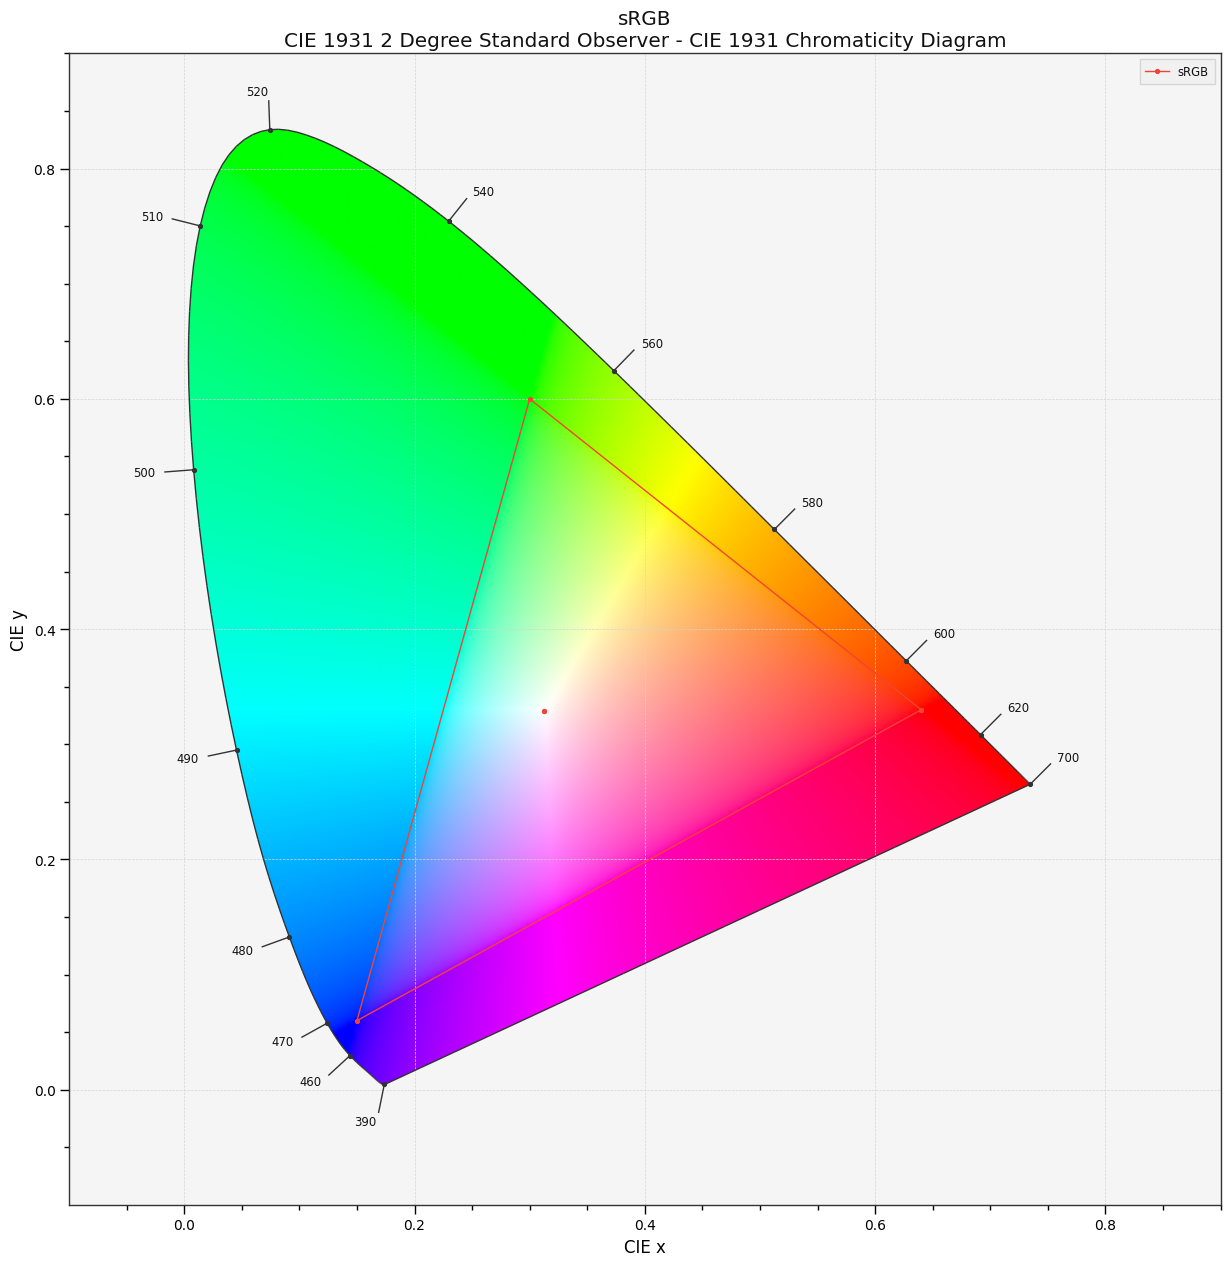

In [47]:
import matplotlib.pyplot as plt

colour.plotting.colour_style();
colour.plotting.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(
    colorspace
);

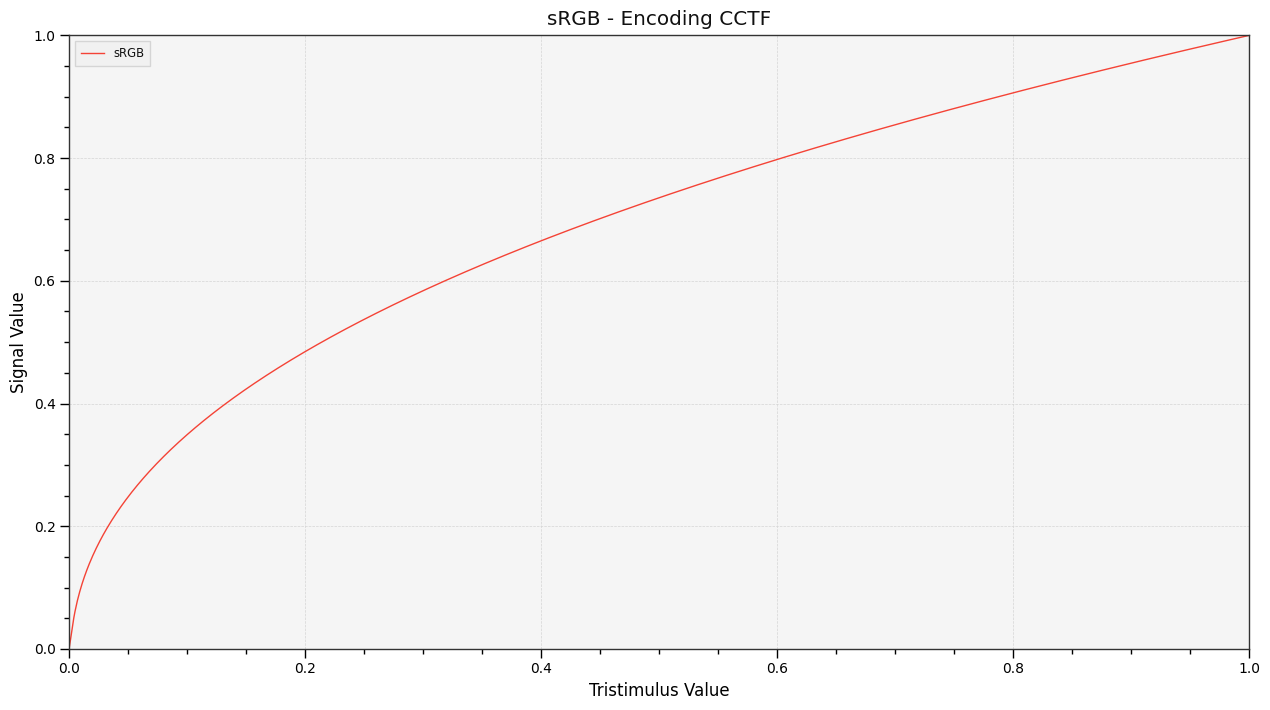

In [50]:
colour.plotting.plot_single_cctf('sRGB');

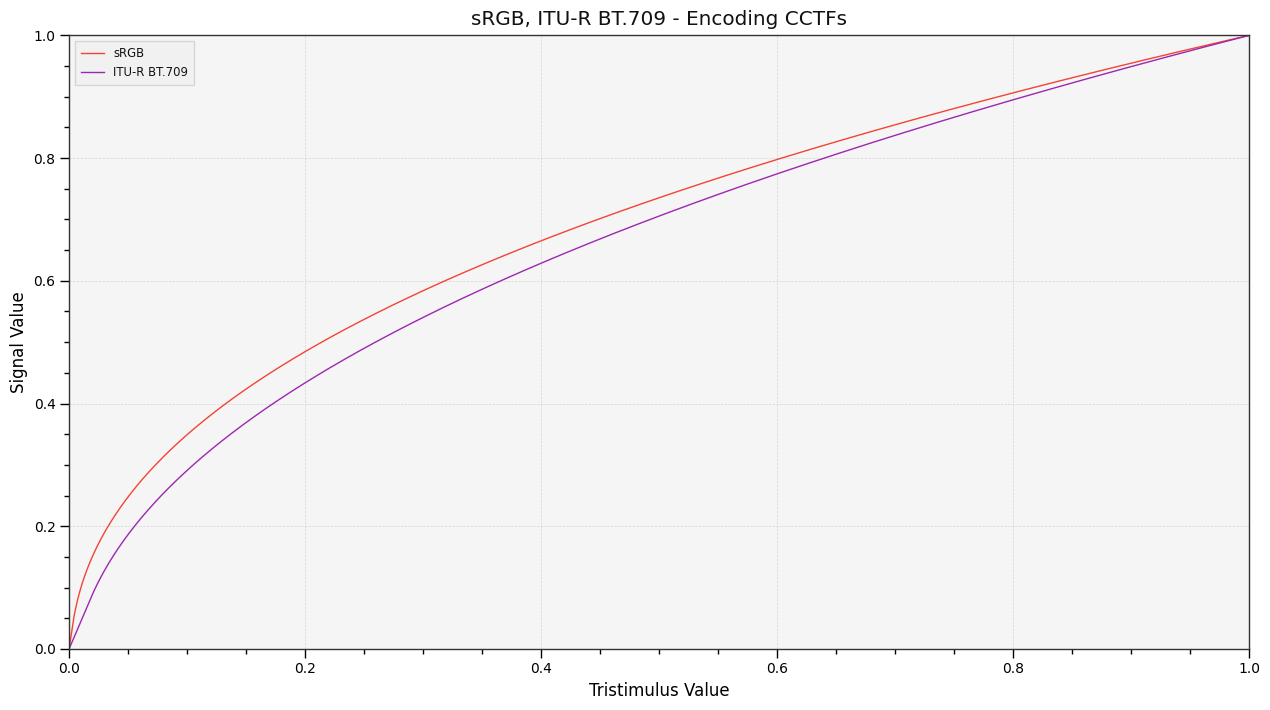

In [61]:
colour.plotting.plot_multi_cctfs(['sRGB', 'ITU-R BT.709']);

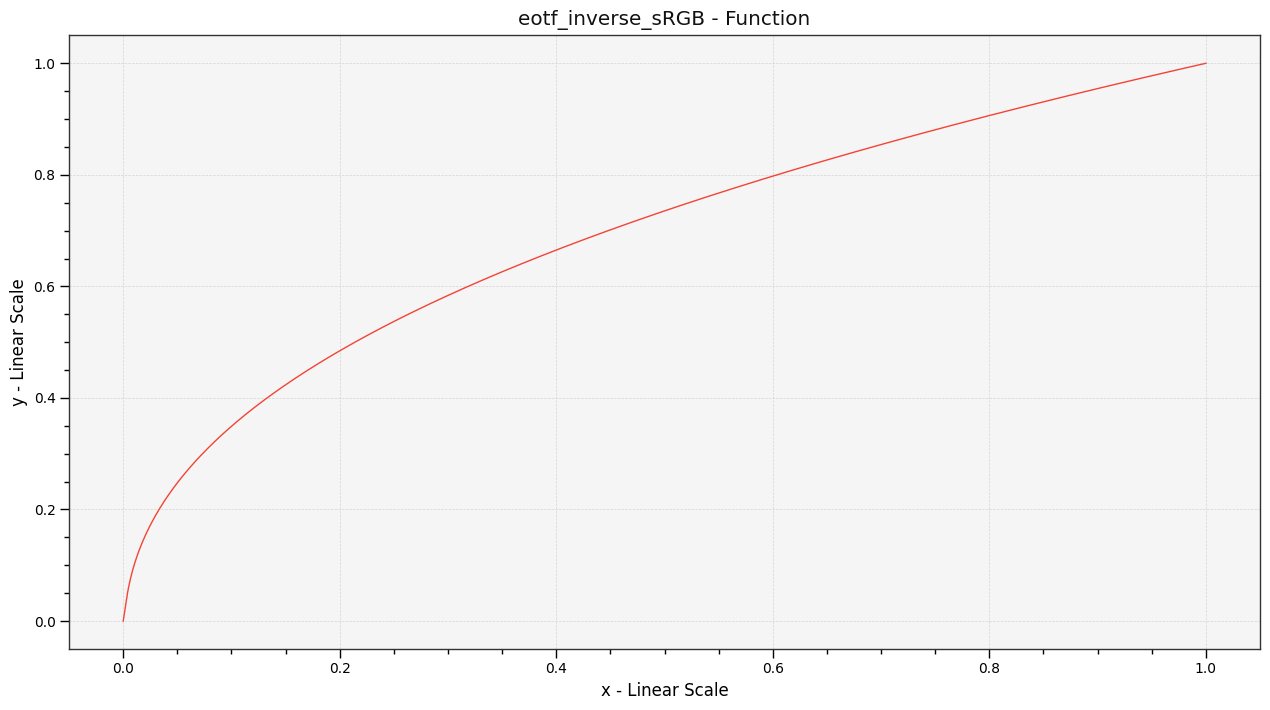

In [52]:
colour.plotting.plot_single_function(colorspace.cctf_encoding);

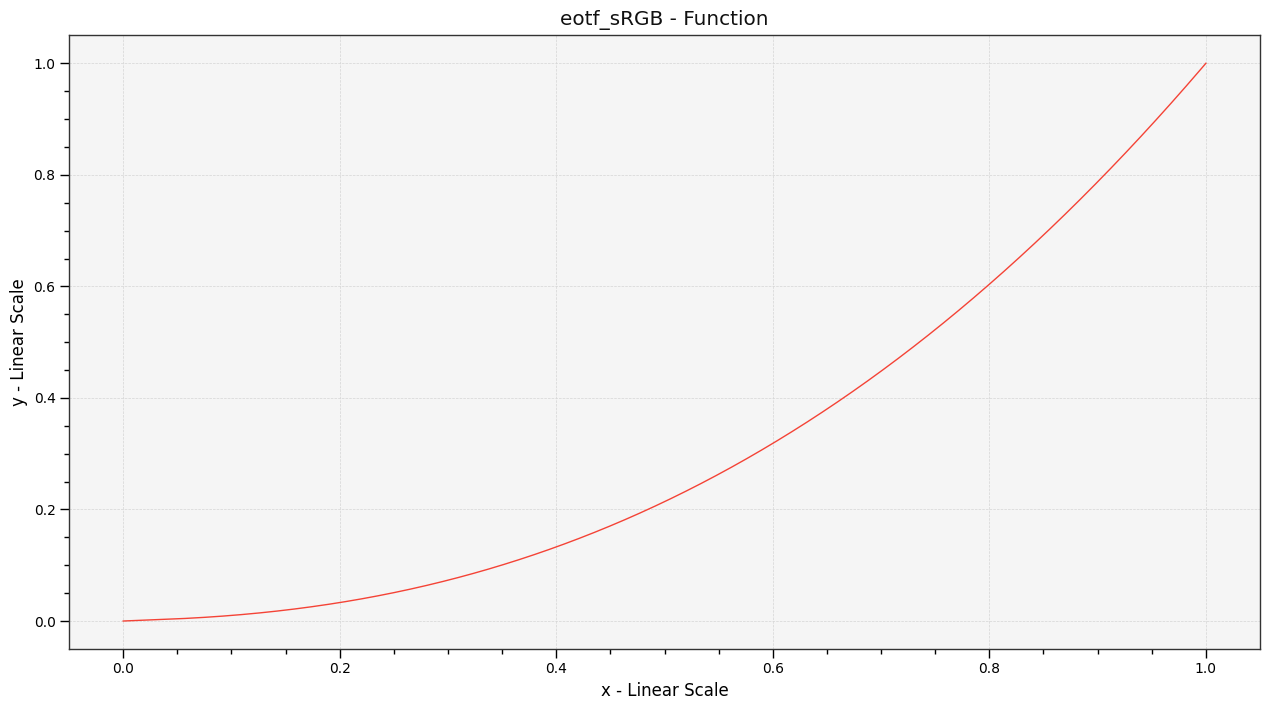

In [54]:
colour.plotting.plot_single_function(colorspace.cctf_decoding);

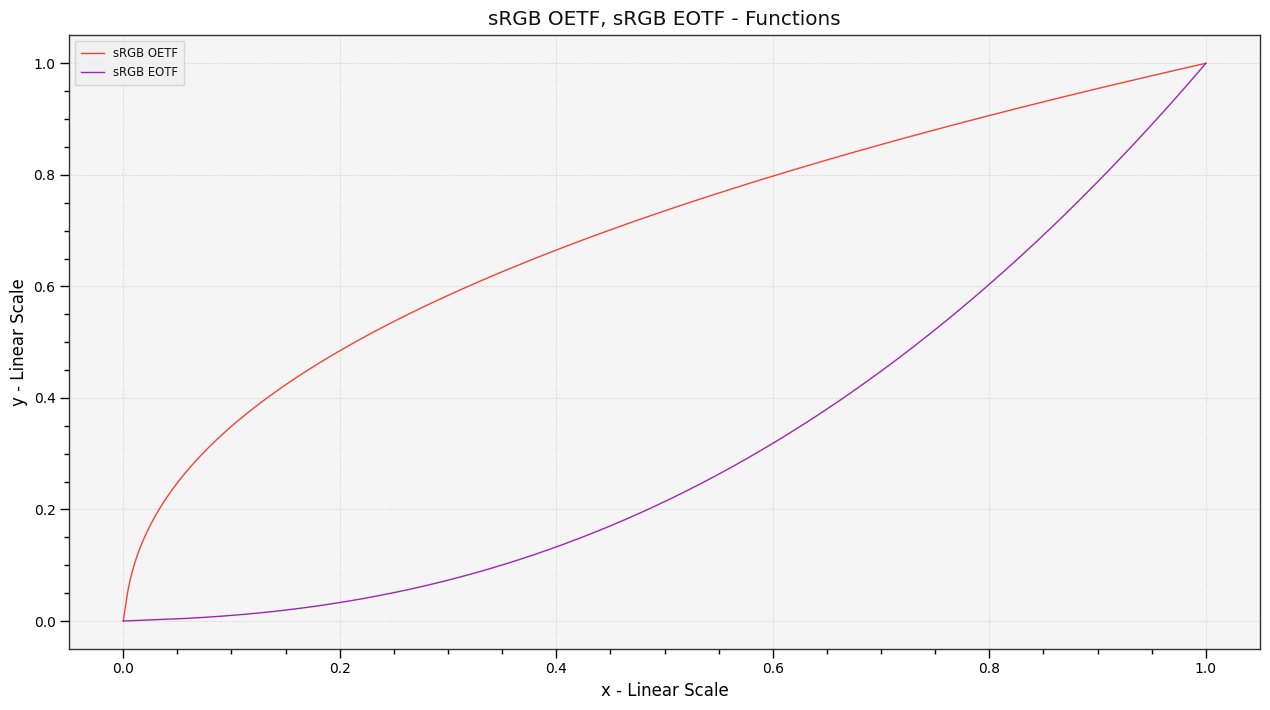

In [57]:
func = {
    'sRGB OETF': colorspace.cctf_encoding,
    'sRGB EOTF': colorspace.cctf_decoding
}

colour.plotting.plot_multi_functions(func);